In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz
import graphviz

In [2]:
dataset=pd.read_csv("/kaggle/input/mushroom-classification/mushrooms.csv")
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
type(dataset)

pandas.core.frame.DataFrame

In [4]:
print("Dataset shape:", dataset.shape)

Dataset shape: (8124, 23)


In [5]:
dataset.keys()

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [6]:
dataset['class'].value_counts()


e    4208
p    3916
Name: class, dtype: int64

In [7]:
n_samples, n_features = dataset.shape
print('Number of samples:', n_samples)
print('Number of features:', n_features)


Number of samples: 8124
Number of features: 23


In [8]:
dataset.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

# DATA VISUALISATION

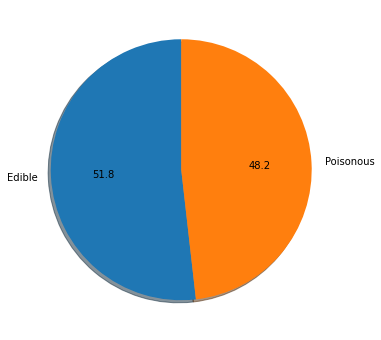

In [9]:
plt.figure(figsize = (6,6))
plt.pie(dataset['class'].value_counts(), startangle = 90, autopct = '%.1f', labels = ['Edible', 'Poisonous'], shadow = True)
plt.show()

Text(0.5, 1.0, 'Number of poisonous/edible mushrooms')

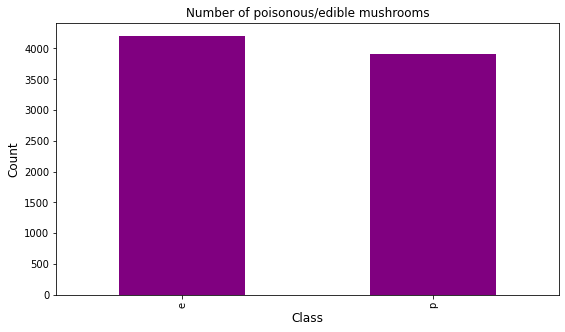

In [10]:
dataset['class'].value_counts().plot(kind='bar', figsize=(9,5), color='purple')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Class', fontsize=12)
plt.title('Number of poisonous/edible mushrooms')

Text(0.5, 1.0, 'Population count')

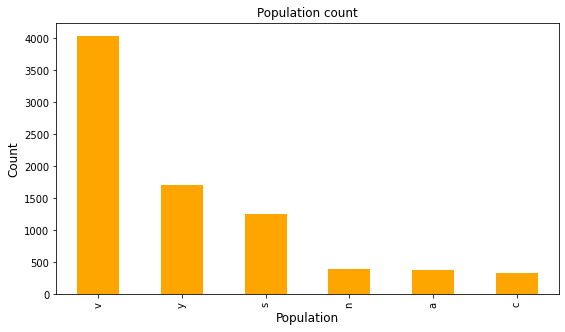

In [11]:
dataset.population.value_counts().plot(kind='bar', figsize=(9,5), color='orange')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Population', fontsize=12)
plt.title('Population count')

Text(0.5, 1.0, 'Bruises count')

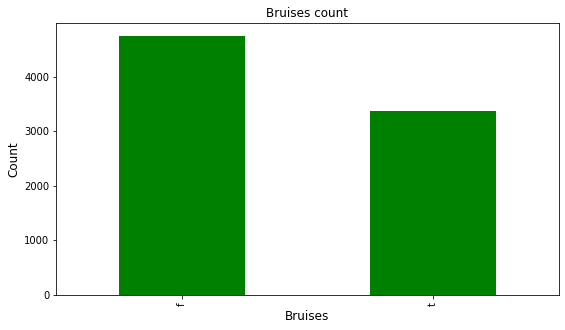

In [12]:
dataset.bruises.value_counts().plot(kind='bar', figsize=(9,5), color='green')
plt.ylabel('Count', fontsize=12)
plt.xlabel('Bruises', fontsize=12)
plt.title('Bruises count')

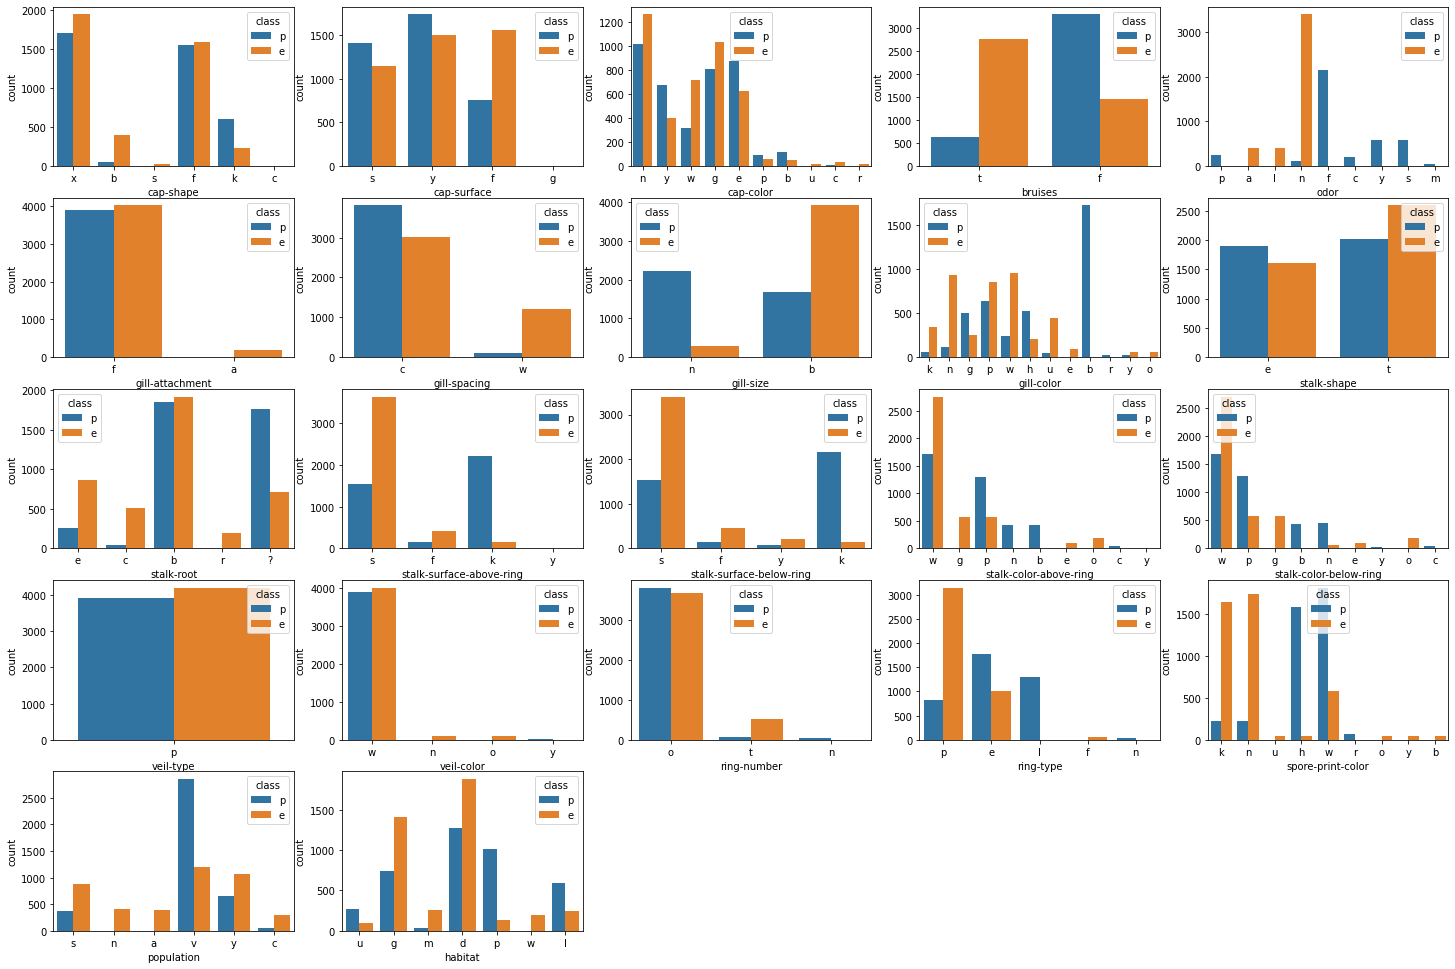

In [13]:
plt.figure(figsize=(25,17))
for i in range(1,len(dataset.columns)):
    plt.subplot(5,5,i)
    sns.countplot(x=dataset[dataset.columns[i]],hue=dataset['class'])

# DATA PREPROCESSING

In [14]:
le = LabelEncoder()
dataset= dataset.apply(LabelEncoder().fit_transform)   
dataset.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


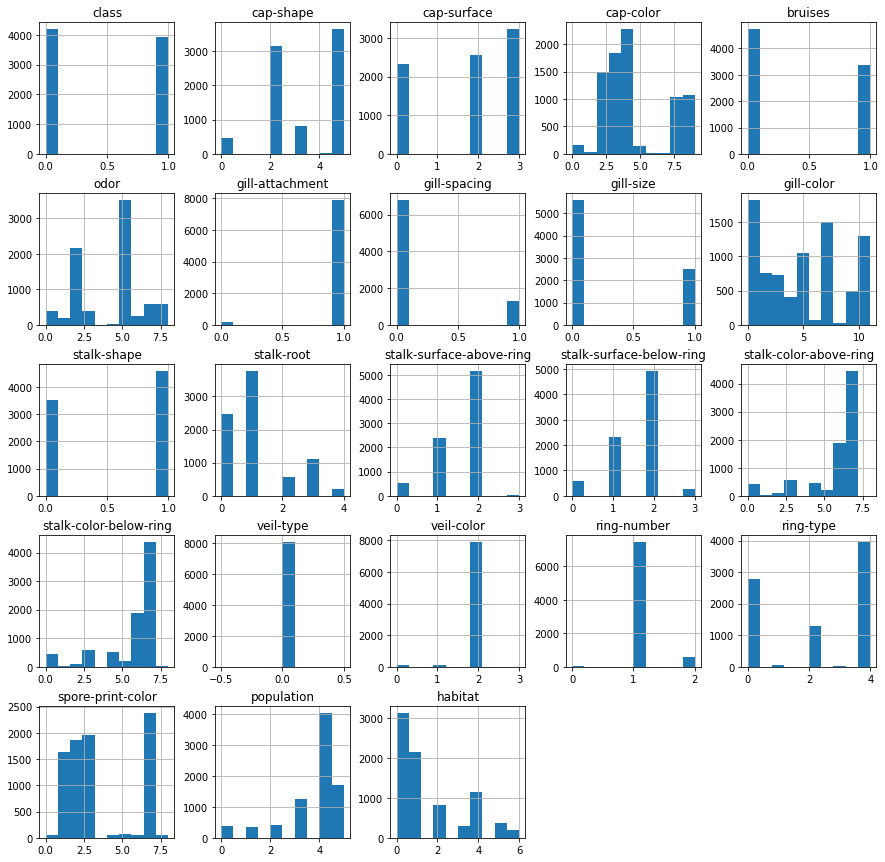

In [15]:
dataset.hist(figsize=(15,15));

In [16]:
X = dataset.drop(['class'] , axis = 1)
Y = dataset['class']
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.25, random_state = 0)

In [17]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [18]:
Y.head()

0    1
1    0
2    0
3    1
4    0
Name: class, dtype: int64

In [19]:
X_train.var()

cap-shape                    2.556176
cap-surface                  1.512676
cap-color                    6.360095
bruises                      0.242798
odor                         4.368448
gill-attachment              0.023704
gill-spacing                 0.136104
gill-size                    0.214752
gill-color                  12.575666
stalk-shape                  0.245323
stalk-root                   1.141097
stalk-surface-above-ring     0.390107
stalk-surface-below-ring     0.458047
stalk-color-above-ring       3.635159
stalk-color-below-ring       3.620530
veil-type                    0.000000
veil-color                   0.054315
ring-number                  0.074654
ring-type                    3.260806
spore-print-color            5.676496
population                   1.590735
habitat                      2.979071
dtype: float64

In [20]:
X_test.var()

cap-shape                    2.627914
cap-surface                  1.512921
cap-color                    6.828748
bruises                      0.243318
odor                         4.593791
gill-attachment              0.029610
gill-spacing                 0.133473
gill-size                    0.210241
gill-color                  12.415222
stalk-shape                  0.246180
stalk-root                   1.080406
stalk-surface-above-ring     0.374674
stalk-surface-below-ring     0.453846
stalk-color-above-ring       3.562855
stalk-color-below-ring       3.690453
veil-type                    0.000000
veil-color                   0.072548
ring-number                  0.069964
ring-type                    3.198519
spore-print-color            5.679921
population                   1.498985
habitat                      2.897412
dtype: float64

In [21]:
print("X_test shape:",X_test.shape) 
print("X_train shape:",X_train.shape)


X_test shape: (2031, 22)
X_train shape: (6093, 22)


In [22]:
print("Y_test shape:",Y_test.shape)
print("Y_train shape:",Y_train.shape)

Y_test shape: (2031,)
Y_train shape: (6093,)


# DECISION TREE CLASSIFIER

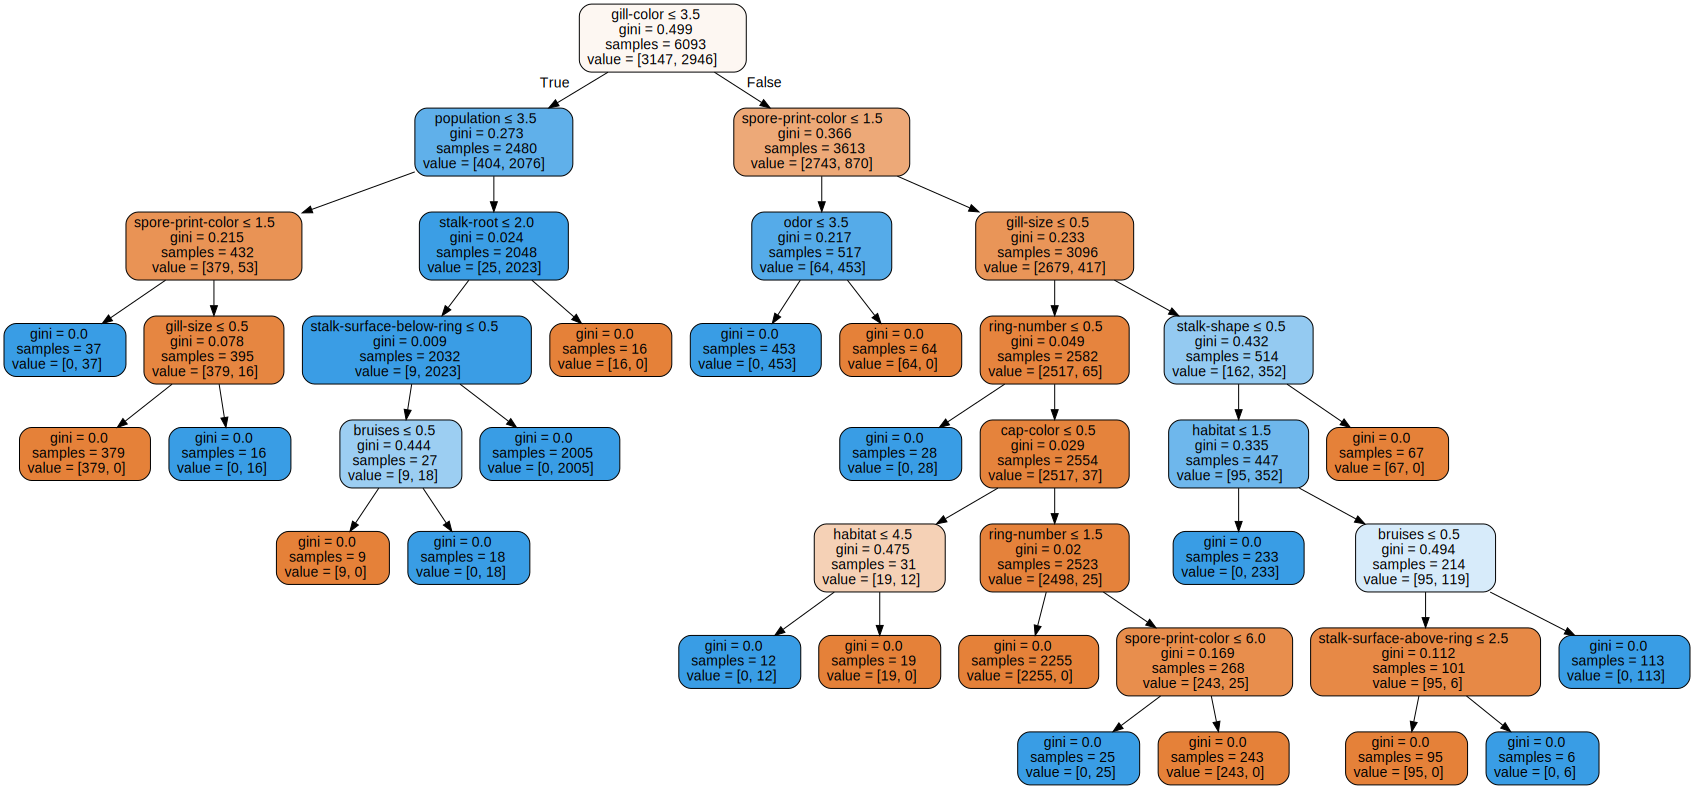

In [23]:
from sklearn.tree import DecisionTreeClassifier 

clf = DecisionTreeClassifier()
clf = clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test) 

dataset = export_graphviz(clf, out_file=None, 
                         feature_names=X.columns,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dataset)  
graph 

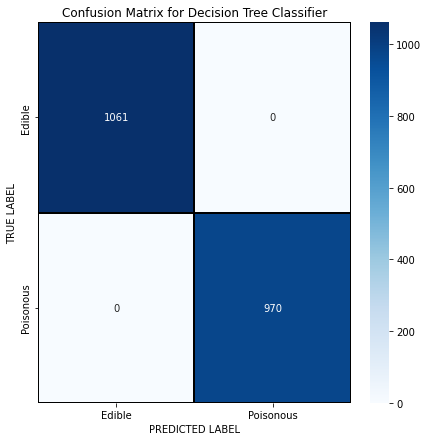

In [24]:
cm = confusion_matrix(Y_test, Y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black",
fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [25]:

accuracy_tree=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_tree)
precision_agac=precision_score(Y_test, Y_pred)
print("Precision:", precision_agac)
recall_agac=recall_score(Y_test, Y_pred)
print("Recall:", recall_agac)
f1_score_agac=f1_score(Y_test, Y_pred)
print("F1_score:", f1_score_agac)


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0


# EUCLIDEAN 

In [26]:
enyakin_komsu1 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
metric_params=None, n_jobs=1,n_neighbors=1, p=2, weights='uniform')
enyakin_komsu1.fit(X_train,Y_train)
Y_pred = enyakin_komsu1.predict(X_test)

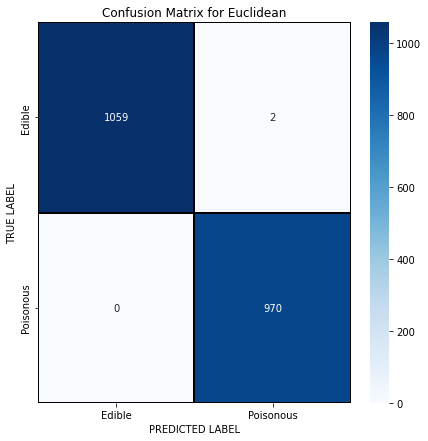

In [27]:
#EUCLIDEAN CONFUSION MATRIX
cm = confusion_matrix(Y_test, Y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Euclidean')
plt.show()

In [28]:
accuracy_euclidean=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_euclidean)
precision_oklid=precision_score(Y_test, Y_pred)
print("Precision:", precision_oklid)
recall_oklid=recall_score(Y_test, Y_pred)
print("Recall:", recall_oklid)
f1_score_oklid=f1_score(Y_test, Y_pred)
print("F1_score:", f1_score_oklid)

Accuracy: 0.999015263417036
Precision: 0.9979423868312757
Recall: 1.0
F1_score: 0.9989701338825953


# MANHATTAN

In [29]:
enyakin_komsu2 = KNeighborsClassifier(algorithm='auto', leaf_size=30, 
metric='manhattan',metric_params=None, n_jobs=1, n_neighbors=6, p=1, weights='uniform')
enyakin_komsu2.fit(X_train,Y_train)
Y_pred = enyakin_komsu2.predict(X_test)



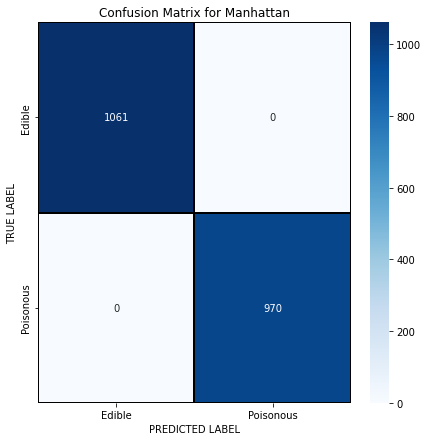

In [30]:
cm = confusion_matrix(Y_test, Y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Manhattan')
plt.show()

In [31]:
accuracy_manhattan=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_manhattan)
precision_manhattan=precision_score(Y_test, Y_pred)
print("Precision:", precision_manhattan)
recall_manhattan=recall_score(Y_test, Y_pred)
print("Recall:", recall_manhattan)
f1_score_manhattan=f1_score(Y_test, Y_pred)
print("F1_score:", f1_score_manhattan)

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1_score: 1.0


# MINKOWSI

In [32]:
enyakin_komsu3 = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
metric_params=None, n_jobs=1, n_neighbors=4, p=2, weights='uniform')
enyakin_komsu3.fit(X_train,Y_train)
Y_pred = enyakin_komsu3.predict(X_test)

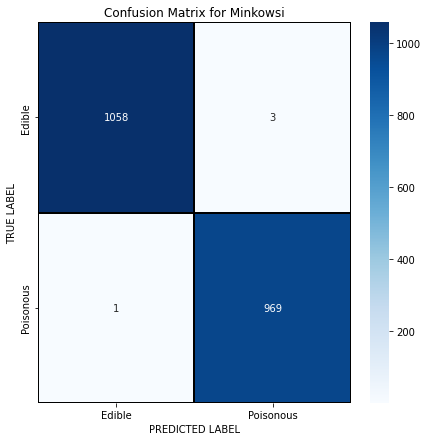

In [33]:
cm = confusion_matrix(Y_test, Y_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax,
            cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Minkowsi')
plt.show()

In [34]:
accuracy_minkowski=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_minkowski)
precision_minkowski=precision_score(Y_test, Y_pred)
print("Precision:", precision_minkowski)
recall_minkowski=recall_score(Y_test, Y_pred)
print("Recall:", recall_minkowski)
f1_score_minkowski=f1_score(Y_test, Y_pred)
print("F1_score:", f1_score_minkowski)

Accuracy: 0.9980305268340719
Precision: 0.9969135802469136
Recall: 0.9989690721649485
F1_score: 0.9979402677651905


# NAVIE BAYES

In [35]:
from sklearn.naive_bayes import GaussianNB  
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)

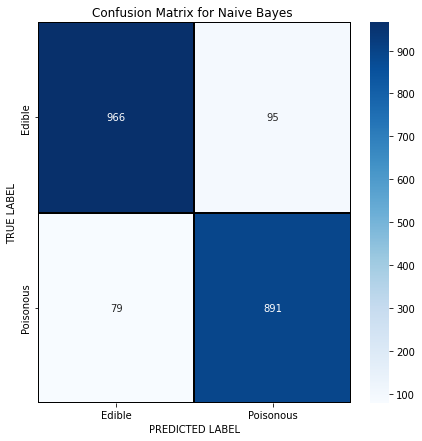

In [36]:
cm = confusion_matrix(Y_test, Y_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax,
            cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes ')
plt.show()


In [37]:

accuracy_bayes=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_bayes)
precision_bayes=precision_score(Y_test, Y_pred)
print("Precision:", precision_bayes)
recall_bayes=recall_score(Y_test, Y_pred)
print("Recall:", recall_manhattan)
f1_score_bayes=f1_score(Y_test, Y_pred)
print("F1_score:", f1_score_bayes)

Accuracy: 0.914327917282127
Precision: 0.9036511156186613
Recall: 1.0
F1_score: 0.9110429447852761


# PCA

In [38]:
X_dummy = pd.get_dummies(X, drop_first=True) 

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [40]:
X_std = StandardScaler().fit_transform(X_dummy)
X_std

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

In [41]:
# Reduce 22 features to 2 features to visualize it.
X_pca = PCA(n_components=2).fit_transform(X_std)

print('Original Number of features =',  X_dummy.shape[1] ,'columns')
print('Reduced Number of features =', X_pca.shape[1], 'columns')

Original Number of features = 22 columns
Reduced Number of features = 2 columns


In [42]:
X_pca.shape

(8124, 2)

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


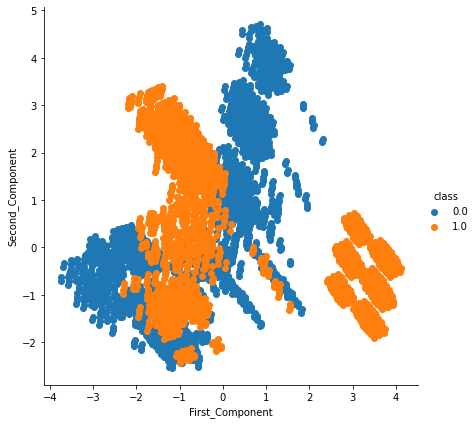

In [43]:
X_pca = np.vstack((X_pca.T, Y)).T

df_pca = pd.DataFrame(X_pca, columns=['First_Component',
                                      'Second_Component',
                                      'class'])
sns.FacetGrid(data=df_pca, hue='class', size=6)\
   .map(plt.scatter, 'First_Component', 'Second_Component')\
   .add_legend();

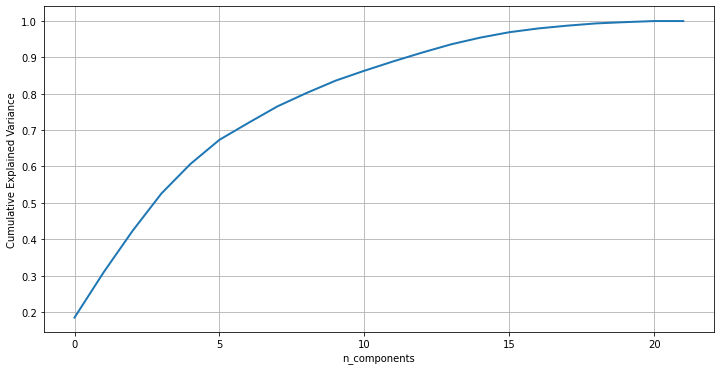

In [44]:
pca = PCA(n_components=22)
X_pca = pca.fit_transform(X_std)

percent_var_explained = pca.explained_variance_ / np.sum(pca.explained_variance_)

cum_var_explained = np.cumsum(percent_var_explained)

# Plot the PCA Spectrum
plt.figure(1, figsize=(12, 6))
plt.clf()
plt.plot(cum_var_explained, linewidth=2)
plt.axis('tight')
plt.grid()
plt.xlabel('n_components')
plt.ylabel('Cumulative Explained Variance');

In [45]:
pca = PCA(n_components=0.85, whiten=True)

X_pca = pca.fit_transform(X_std)
# Show the result
print('Original number of features:', X_dummy.shape[1])
print('Reduced number of features:', X_pca.shape[1])

Original number of features: 22
Reduced number of features: 11


In [46]:
X_pca.shape

(8124, 11)

In [47]:
X_pca

array([[-0.29178936, -0.60475927, -0.7885224 , ...,  1.82900571,
         0.48119687, -0.90871567],
       [-1.1594424 ,  0.17295673, -0.77479811, ..., -0.75416743,
        -0.18790193,  0.25572795],
       [-0.94399155, -0.16794034, -0.88572524, ...,  0.76892068,
         0.4022008 , -0.38628528],
       ...,
       [-0.82382581, -0.46949796,  1.76424691, ...,  0.23399949,
        -0.22184634, -0.34831348],
       [ 1.86488387, -0.64008187,  0.10872342, ..., -0.22164305,
        -0.18808342, -1.84812831],
       [-0.80029577, -0.76143697,  1.57943588, ..., -0.55097417,
        -0.22674082, -0.03816132]])

In [48]:
newdata = pd.DataFrame(X_pca)
print(newdata)
type(newdata)

            0         1         2         3         4         5         6   \
0    -0.291789 -0.604759 -0.788522  0.126024 -1.112580 -1.302411  1.219292   
1    -1.159442  0.172957 -0.774798  0.184822 -1.150596 -1.259003  1.094439   
2    -0.943992 -0.167940 -0.885725  0.717372 -1.387212 -0.740158 -1.787236   
3    -0.449521 -0.468836 -0.866168  0.251471 -1.617804 -1.786672  1.101691   
4     0.350364  0.768057 -2.009277  0.553484  1.181365 -0.470685  0.591921   
...        ...       ...       ...       ...       ...       ...       ...   
8119 -1.140514 -0.569289  1.632041  4.384853  2.135991 -1.127218  0.282888   
8120 -1.289840 -1.036081  2.791022  5.112761  3.045799 -1.846332  1.690130   
8121 -0.823826 -0.469498  1.764247  4.384294  1.899007 -1.332615 -0.327454   
8122  1.864884 -0.640082  0.108723 -0.099549 -0.117985 -0.386913 -0.338891   
8123 -0.800296 -0.761437  1.579436  4.442717  2.086095 -0.998894  1.521930   

            7         8         9         10  
0     1.583864  

pandas.core.frame.DataFrame

In [49]:
le = LabelEncoder()
newdata = newdata.apply(LabelEncoder().fit_transform)   
newdata.head()

,0,1,2,3,4,5,6,7,8,9,10
0,4500,2867,1756,6059,1069,526,7447,7663,7865,5732,997
1,401,5394,1801,6248,1025,586,7050,2755,2104,3330,5507
2,847,4342,1485,7249,751,1643,195,2956,6323,5497,2556
3,3840,3425,1530,6405,449,108,7076,7430,6438,6006,369
4,5755,6032,136,7033,7198,2458,5312,7701,1563,7859,4376


In [50]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [51]:
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)

# PCA-Decision Tree


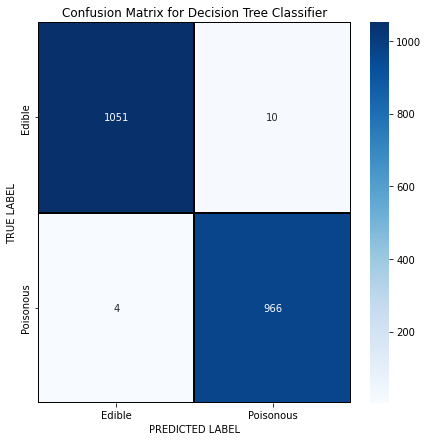

In [52]:
clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X_train, Y_train)
Y_pred = clf2.predict(X_test) 

cm = confusion_matrix(Y_test, Y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black",
fmt = ".0f", ax=ax, cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [53]:

Accuracy_tree1=accuracy_score(Y_test, Y_pred)
print("Accuracy:", Accuracy_tree1)
precision_agac1=precision_score(Y_test, Y_pred)
print("Precision:", precision_agac1)
recall_agac1=recall_score(Y_test, Y_pred)
print("Recall:", recall_agac1)
f1_score_agac1=f1_score(Y_test, Y_pred)
print("F1_score:", f1_score_agac1)


Accuracy: 0.9931068439192516
Precision: 0.9897540983606558
Recall: 0.9958762886597938
F1_score: 0.9928057553956835


# PCA-Euclidean

In [54]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNN

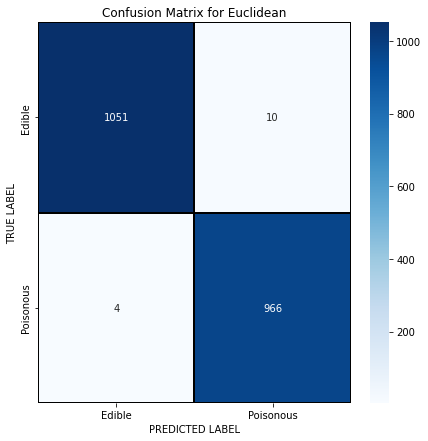



KNeighborsClassifier
---------------------------------
Accuracy:  1.0
F1 score:  1.0
Precision: 1.0
Recall: 1.0


In [55]:
# list of models to train
#euclidean
KNNModel = KNN(n_neighbors=1, n_jobs=-1)
models = [KNNModel]
#matrix
cm = confusion_matrix(Y_test, Y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Euclidean')
plt.show()

for model in models:
  print('\n')
  print(type(model).__name__)
  print('---------------------------------')
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test,Y_pred)
  f1 = f1_score(Y_test, Y_pred)
  print('Accuracy: ',accuracy)
  print('F1 score: ',f1)  
  precision_oklid=precision_score(Y_test, Y_pred)
  print("Precision:", precision_oklid)
  recall_oklid=recall_score(Y_test, Y_pred)
  print("Recall:", recall_oklid)

# PCA-Manhattan

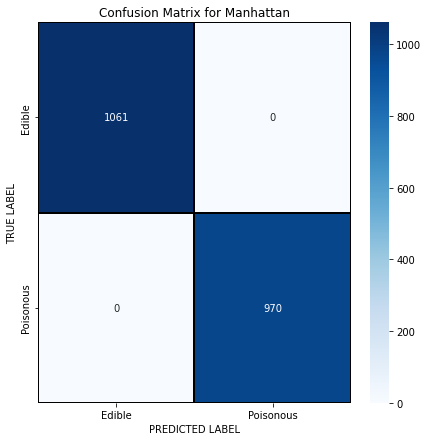



KNeighborsClassifier
---------------------------------
Accuracy:  0.9980305268340719
F1 score:  0.9979338842975207
Precision: 1.0
Recall: 0.9958762886597938


In [56]:
# list of models to train
#manhattan
KNNModel = KNN(n_neighbors=2, n_jobs=-1)
models = [KNNModel]
#matrix
cm = confusion_matrix(Y_test, Y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax, 
            cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Manhattan')
plt.show()

for model in models:
  print('\n')
  print(type(model).__name__)
  print('---------------------------------')
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test,Y_pred)
  f1 = f1_score(Y_test, Y_pred)
  print('Accuracy: ',accuracy)
  print('F1 score: ',f1)  
  precision_oklid=precision_score(Y_test, Y_pred)
  print("Precision:", precision_oklid)
  recall_oklid=recall_score(Y_test, Y_pred)
  print("Recall:", recall_oklid)

# PCA-Minkowski

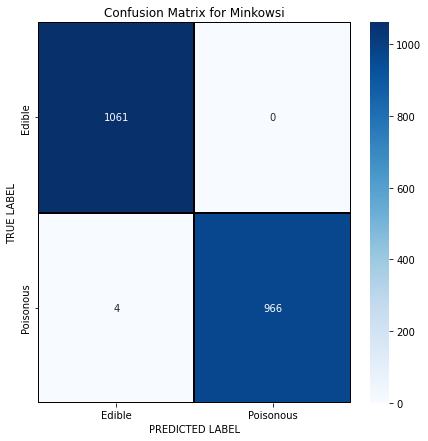



KNeighborsClassifier
---------------------------------
Accuracy:  0.9985228951255539
F1 score:  0.9984512132163139
Precision: 1.0
Recall: 0.9969072164948454


In [57]:
# list of models to train
#minkowski
KNNModel = KNN(n_neighbors=3, n_jobs=-1)
models = [KNNModel]
#matrix
cm = confusion_matrix(Y_test, Y_pred)
x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]
f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax,
            cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Minkowsi')
plt.show()

for model in models:
  print('\n')
  print(type(model).__name__)
  print('---------------------------------')
  model.fit(X_train, Y_train)
  Y_pred = model.predict(X_test)
  accuracy = accuracy_score(Y_test,Y_pred)
  f1 = f1_score(Y_test, Y_pred)
  print('Accuracy: ',accuracy)
  print('F1 score: ',f1)  
  precision_oklid=precision_score(Y_test, Y_pred)
  print("Precision:", precision_oklid)
  recall_oklid=recall_score(Y_test, Y_pred)
  print("Recall:", recall_oklid)

# PCA-Bayes

In [58]:
nb = GaussianNB()
nb.fit(X_train,Y_train)
Y_pred = nb.predict(X_test)

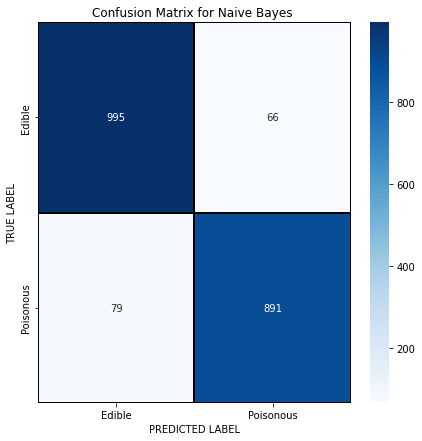

In [59]:
cm = confusion_matrix(Y_test, Y_pred)

x_axis_labels = ["Edible", "Poisonous"]
y_axis_labels = ["Edible", "Poisonous"]

f, ax = plt.subplots(figsize =(7,7))
sns.heatmap(cm, annot = True, linewidths=0.2, linecolor="black", fmt = ".0f", ax=ax,
            cmap="Blues", xticklabels=x_axis_labels, yticklabels=y_axis_labels)
plt.xlabel("PREDICTED LABEL")
plt.ylabel("TRUE LABEL")
plt.title('Confusion Matrix for Naive Bayes ')
plt.show()


In [60]:
accuracy_bayes=accuracy_score(Y_test, Y_pred)
print("Accuracy:", accuracy_bayes)
precision_bayes=precision_score(Y_test, Y_pred)
print("Precision:", precision_bayes)
recall_bayes=recall_score(Y_test, Y_pred)
print("Recall:", recall_manhattan)
f1_score_bayes=f1_score(Y_test, Y_pred)
print("F1_score:", f1_score_bayes)

Accuracy: 0.9286065977351059
Precision: 0.9310344827586207
Recall: 1.0
F1_score: 0.9247535028541775


# COMPARISONS

In [61]:
print('\n')
print("DECISION TREE CLASSIFIER")
normal = {'Accuracy' : '1.0', 'Precision' : '1.0', 'Recall' : '1.0', 'F1-Score' : '1.0'}
pca = {'Accuracy' : '0.9940915805022157', 'Precision' : '0.9897750511247444' , 
       'Recall' : '0.9979381443298969', 'F1-Score' : '0.9938398357289528'}
x = pd.DataFrame({'NORMAL' : normal, 'PCA' : pca})
x



DECISION TREE CLASSIFIER


,NORMAL,PCA
Accuracy,1.0,0.9940915805022157
Precision,1.0,0.9897750511247444
Recall,1.0,0.9979381443298969
F1-Score,1.0,0.9938398357289528


In [62]:
print('\n')
print("KNN-EUCLIDEAN")
nor = {'Accuracy' : '0.999015263417036', 'Precision' : '0.9979423868312757', 
       'Recall' : '1.0', 'F1-Score' : '0.9989701338825953'}
pca = {'Accuracy' : '1.0', 'Precision' : '1.0' , 'Recall' : '1.0', 'F1-Score' : '1.0'}
x = pd.DataFrame({'NORMAL' : nor, 'PCA' : pca})
x



KNN-EUCLIDEAN


,NORMAL,PCA
Accuracy,0.999015263417036,1.0
Precision,0.9979423868312757,1.0
Recall,1.0,1.0
F1-Score,0.9989701338825953,1.0


In [63]:
print('\n')
print("KNN-MANHATTAN")
nor = {'Accuracy' : '1.0', 'Precision' : '1.0', 'Recall' : '1.0', 'F1-Score' : '1.0'}
pca = {'Accuracy' : '0.9980305268340719', 'Precision' : '0.9979338842975207' , 
       'Recall' : '1.0', 'F1-Score' : '0.9958762886597938'}
x = pd.DataFrame({'NORMAL' : nor, 'PCA' : pca})
x



KNN-MANHATTAN


,NORMAL,PCA
Accuracy,1.0,0.9980305268340719
Precision,1.0,0.9979338842975207
Recall,1.0,1.0
F1-Score,1.0,0.9958762886597938


In [64]:
print('\n')
print("KNN-MINKOWSI")
nor = {'Accuracy' : '0.9980305268340719', 'Precision' : '0.9969135802469136', 
       'Recall' : '0.9989690721649485', 'F1-Score' : '0.9979402677651905'}
pca = {'Accuracy' : '0.9985228951255539', 'Precision' : '0.9984512132163139' , 
       'Recall' : '1.0', 'F1-Score' : '0.9969072164948454'}
x = pd.DataFrame({'NORMAL' : nor, 'PCA' : pca})
x



KNN-MINKOWSI


,NORMAL,PCA
Accuracy,0.9980305268340719,0.9985228951255539
Precision,0.9969135802469136,0.9984512132163139
Recall,0.9989690721649485,1.0
F1-Score,0.9979402677651905,0.9969072164948454


In [65]:
print('\n')
print("NAVIE BAYES")
nor = {'Accuracy' : '0.9980305268340719', 'Precision' : '0.9969135802469136', 
       'Recall' : '0.9989690721649485', 'F1-Score' : '0.9979402677651905'}
pca = {'Accuracy' : '0.9286065977351059', 'Precision' : '0.9310344827586207' , 
       'Recall' : '1.0', 'F1-Score' : '0.9247535028541775'}
x = pd.DataFrame({'NORMAL' : nor, 'PCA' : pca})
x



NAVIE BAYES


,NORMAL,PCA
Accuracy,0.9980305268340719,0.9286065977351059
Precision,0.9969135802469136,0.9310344827586207
Recall,0.9989690721649485,1.0
F1-Score,0.9979402677651905,0.9247535028541775


# ANN

In [66]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from keras.models import Sequential 
from keras.layers import Dense 
def build_classifier():
    classifier = Sequential() 
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu', input_dim = X_train.shape[1]))
    classifier.add(Dense(units = 8, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier, epochs = 70,batch_size=10)
accuracies = cross_val_score(estimator = classifier, X = X_train, y= Y_train, cv = 3)
mean = accuracies.mean()
variance = accuracies.std()
print("Accuracy mean: "+ str(mean))
print("Accuracy variance: "+ str(variance))


2023-01-03 09:51:54.786511: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.
2023-01-03 09:51:54.978229: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/70
407/407 [==============================] - 1s 2ms/step - loss: 0.4563 - accuracy: 0.8678
Epoch 2/70
407/407 [==============================] - 1s 2ms/step - loss: 0.1694 - accuracy: 0.9333
Epoch 3/70
407/407 [==============================] - 1s 2ms/step - loss: 0.1266 - accuracy: 0.9493
Epoch 4/70
407/407 [==============================] - 1s 2ms/step - loss: 0.0985 - accuracy: 0.9589
Epoch 5/70
407/407 [==============================] - 1s 2ms/step - loss: 0.0745 - accuracy: 0.9724
Epoch 6/70
407/407 [==============================] - 1s 2ms/step - loss: 0.0577 - accuracy: 0.9825
Epoch 7/70
407/407 [==============================] - 1s 2ms/step - loss: 0.0458 - accuracy: 0.9850
Epoch 8/70
407/407 [==============================] - 1s 2ms/step - loss: 0.0378 - accuracy: 0.9872
Epoch 9/70
407/407 [==============================] - 1s 2ms/step - loss: 0.0323 - accuracy: 0.9894
Epoch 10/70
407/407 [==============================] - 1s 2ms/step - loss: 0.0286 - accuracy: 0.9897